In [515]:
import os
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [516]:
pd.set_option('display.max_columns', None)

In [517]:
# Importando a base
df_base = pd.read_csv('Mens_VolleyballPlusLiga_2028_2023/Mens-Volleyball-PlusLiga-2008-2023.csv')

# Convertendo para Data
df_base['Date'] = pd.to_datetime(df_base['Date'], format='%d.%m.%Y, %H:%M', errors='coerce')
df_base['Ano'] = pd.to_datetime(df_base['Date']).dt.year

# Filtrando a base para ter dados a partir de 2013
df_base = df_base.loc[df_base['Date'].dt.year >= 2013]

df_base.sort_values('Date', ascending=True, inplace=True)
df_base.reset_index(inplace=True, drop=True)
df_base['Match_ID'] = df_base.index
df_base.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,T1_Srv_Ace,T1_Srv_Eff,T1_Rec_Sum,T1_Rec_Err,T1_Rec_Pos,T1_Rec_Perf,T1_Att_Sum,T1_Att_Err,T1_Att_Blk,T1_Att_Kill,T1_Att_Kill_Perc,T1_Att_Eff,T1_Blk_Sum,T1_Blk_As,T2_Sum,T2_BP,T2_Ratio,T2_Srv_Sum,T2_Srv_Err,T2_Srv_Ace,T2_Srv_Eff,T2_Rec_Sum,T2_Rec_Err,T2_Rec_Pos,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner,Ano,Match_ID
0,2013-01-04 18:00:00,PGE Skra Bełchatów,Jastrzębski Węgiel,0,3,50.0,69.0,3.0,11.0,"1,00",68.0,4,30.0,30.0,44%,17,25%,86.0,9.0,9.0,39,45%,8.0,"2,67",55,77,4,9,"1,33",58,3,24,26,44%,18,31%,77,7,8,42,55%,9,"3,00",1,2013,0
1,2013-01-04 18:00:00,Asseco Resovia,Chemik Bydgoszcz,3,0,63.0,73.0,4.0,12.0,"1,33",61.0,1,17.0,29.0,47%,14,22%,90.0,1.0,10.0,43,48%,16.0,"5,33",48,67,1,6,"0,33",61,4,14,34,55%,20,32%,91,5,16,37,41%,10,"3,33",0,2013,1
2,2013-01-04 18:00:00,AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,3,2,82.0,123.0,7.0,23.0,"1,40",98.0,6,39.0,40.0,40%,18,18%,134.0,10.0,14.0,65,49%,10.0,"2,00",88,122,6,24,"1,20",100,7,36,41,41%,28,28%,122,14,10,68,56%,14,"2,80",0,2013,2
3,2013-01-05 14:30:00,Projekt Warszawa,Społem Kielce,2,3,75.0,104.0,6.0,11.0,"1,20",86.0,4,14.0,55.0,63%,34,39%,126.0,12.0,13.0,54,43%,15.0,"3,00",80,103,4,17,"0,80",93,6,21,48,51%,26,27%,131,9,14,63,48%,13,"2,60",1,2013,3
4,2013-01-05 17:00:00,Trefl Gdańsk,AZS Częstochowa,3,2,79.0,107.0,9.0,12.0,"1,80",78.0,6,11.0,47.0,60%,18,23%,109.0,6.0,15.0,51,47%,19.0,"3,80",64,89,6,11,"1,20",95,9,14,48,50%,24,25%,116,14,19,43,37%,15,"3,00",0,2013,4


In [518]:
print(f'Numero de partidas jogadas: {len(df_base)}')

Numero de partidas jogadas: 2015


In [519]:
# Tirando os % das colunas de percentual
perc_cols = [
    'T1_Srv_Eff', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Kill_Perc', 
    'T1_Att_Eff', 'T1_Att_Sum', 'T2_Srv_Eff', 'T2_Rec_Pos', 'T2_Rec_Perf', 
    'T2_Att_Kill_Perc', 'T2_Att_Eff', 'T2_Att_Sum'
]
for col in perc_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace('%', ''))

In [520]:
# Ajustando virgulas por pontos nas colunas de float
float_cols = ['T1_Srv_Err', 'T1_Blk_As', 'T2_Srv_Err', 'T2_Blk_As']
for col in float_cols:
    df_base[col] = pd.to_numeric(df_base[col].str.replace(',', '.'))

In [521]:
df_base.dtypes

Date                datetime64[ns]
Team_1                      object
Team_2                      object
T1_Score                     int64
T2_Score                     int64
T1_Sum                     float64
T1_BP                      float64
T1_Ratio                   float64
T1_Srv_Sum                 float64
T1_Srv_Err                 float64
T1_Srv_Ace                 float64
T1_Srv_Eff                   int64
T1_Rec_Sum                 float64
T1_Rec_Err                 float64
T1_Rec_Pos                   int64
T1_Rec_Perf                  int64
T1_Att_Sum                   int64
T1_Att_Err                 float64
T1_Att_Blk                 float64
T1_Att_Kill                float64
T1_Att_Kill_Perc             int64
T1_Att_Eff                   int64
T1_Blk_Sum                 float64
T1_Blk_As                  float64
T2_Sum                       int64
T2_BP                        int64
T2_Ratio                     int64
T2_Srv_Sum                   int64
T2_Srv_Err          

In [522]:
time1_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano']], 
                      df_base.loc[:, 'T1_Sum': 'T1_Blk_As']], axis=1)

time2_df = pd.concat([df_base[['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano']], 
                      df_base.loc[:, 'T2_Sum': 'T2_Blk_As']], axis=1)

time1_df['Oponente'] = df_base['Team_2']

time2_df['Oponente'] = df_base['Team_1']

In [523]:
time1_df.columns

Index(['Match_ID', 'Date', 'Team_1', 'T1_Score', 'Ano', 'T1_Sum', 'T1_BP',
       'T1_Ratio', 'T1_Srv_Sum', 'T1_Srv_Err', 'T1_Srv_Ace', 'T1_Srv_Eff',
       'T1_Rec_Sum', 'T1_Rec_Err', 'T1_Rec_Pos', 'T1_Rec_Perf', 'T1_Att_Sum',
       'T1_Att_Err', 'T1_Att_Blk', 'T1_Att_Kill', 'T1_Att_Kill_Perc',
       'T1_Att_Eff', 'T1_Blk_Sum', 'T1_Blk_As', 'Oponente'],
      dtype='object')

In [524]:
time2_df.columns

Index(['Match_ID', 'Date', 'Team_2', 'T2_Score', 'Ano', 'T2_Sum', 'T2_BP',
       'T2_Ratio', 'T2_Srv_Sum', 'T2_Srv_Err', 'T2_Srv_Ace', 'T2_Srv_Eff',
       'T2_Rec_Sum', 'T2_Rec_Err', 'T2_Rec_Pos', 'T2_Rec_Perf', 'T2_Att_Sum',
       'T2_Att_Err', 'T2_Att_Blk', 'T2_Att_Kill', 'T2_Att_Kill_Perc',
       'T2_Att_Eff', 'T2_Blk_Sum', 'T2_Blk_As', 'Oponente'],
      dtype='object')

In [525]:
# Combinando os datasets para que cada linha seja para a performance de um time
concatenacao_colunas = {x: y for x, y in zip(time2_df.columns, time1_df.columns)}
time_perf_df = pd.concat([time1_df, time2_df.rename(columns=concatenacao_colunas)])
time_perf_df.columns = time_perf_df.columns.str.replace('T1_', '')
time_perf_df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente
0,0,2013-01-04 18:00:00,PGE Skra Bełchatów,0,2013,50.0,69.0,3.0,11.0,1.00,68.0,4,30.0,30.0,44,17,25,86.0,9.0,9.0,39,45,8.0,2.67,Jastrzębski Węgiel
1,1,2013-01-04 18:00:00,Asseco Resovia,3,2013,63.0,73.0,4.0,12.0,1.33,61.0,1,17.0,29.0,47,14,22,90.0,1.0,10.0,43,48,16.0,5.33,Chemik Bydgoszcz
2,2,2013-01-04 18:00:00,AZS Olsztyn,3,2013,82.0,123.0,7.0,23.0,1.40,98.0,6,39.0,40.0,40,18,18,134.0,10.0,14.0,65,49,10.0,2.00,ZAKSA Kędzierzyn-Koźle
3,3,2013-01-05 14:30:00,Projekt Warszawa,2,2013,75.0,104.0,6.0,11.0,1.20,86.0,4,14.0,55.0,63,34,39,126.0,12.0,13.0,54,43,15.0,3.00,Społem Kielce
4,4,2013-01-05 17:00:00,Trefl Gdańsk,3,2013,79.0,107.0,9.0,12.0,1.80,78.0,6,11.0,47.0,60,18,23,109.0,6.0,15.0,51,47,19.0,3.80,AZS Częstochowa


In [526]:
print(f'Numero de partidas jogadas: {len(time_perf_df)}')

Numero de partidas jogadas: 4030


In [527]:
df = time_perf_df.copy()

df['Vencedor'] = np.where(df['Score'] < 3, 0, 1)
df.head()

,Match_ID,Date,Team_1,Score,Ano,Sum,BP,Ratio,Srv_Sum,Srv_Err,Srv_Ace,Srv_Eff,Rec_Sum,Rec_Err,Rec_Pos,Rec_Perf,Att_Sum,Att_Err,Att_Blk,Att_Kill,Att_Kill_Perc,Att_Eff,Blk_Sum,Blk_As,Oponente,Vencedor
0,0,2013-01-04 18:00:00,PGE Skra Bełchatów,0,2013,50.0,69.0,3.0,11.0,1.00,68.0,4,30.0,30.0,44,17,25,86.0,9.0,9.0,39,45,8.0,2.67,Jastrzębski Węgiel,0
1,1,2013-01-04 18:00:00,Asseco Resovia,3,2013,63.0,73.0,4.0,12.0,1.33,61.0,1,17.0,29.0,47,14,22,90.0,1.0,10.0,43,48,16.0,5.33,Chemik Bydgoszcz,1
2,2,2013-01-04 18:00:00,AZS Olsztyn,3,2013,82.0,123.0,7.0,23.0,1.40,98.0,6,39.0,40.0,40,18,18,134.0,10.0,14.0,65,49,10.0,2.00,ZAKSA Kędzierzyn-Koźle,1
3,3,2013-01-05 14:30:00,Projekt Warszawa,2,2013,75.0,104.0,6.0,11.0,1.20,86.0,4,14.0,55.0,63,34,39,126.0,12.0,13.0,54,43,15.0,3.00,Społem Kielce,0
4,4,2013-01-05 17:00:00,Trefl Gdańsk,3,2013,79.0,107.0,9.0,12.0,1.80,78.0,6,11.0,47.0,60,18,23,109.0,6.0,15.0,51,47,19.0,3.80,AZS Częstochowa,1


In [528]:
partidas_por_ano = df.groupby('Ano').size().reset_index(name='Quantidade_de_Partidas')
partidas_por_ano

,Ano,Quantidade_de_Partidas
0,2013,270
1,2014,450
2,2015,394
3,2016,502
4,2017,504
5,2018,456
6,2019,198
7,2020,220
8,2021,376
9,2022,534


In [551]:
print(f"Número de times: {partidas['Team_1'].nunique()}")

Número de times: 21


## CONTAGEM DE VITÓRIAS POR TIME

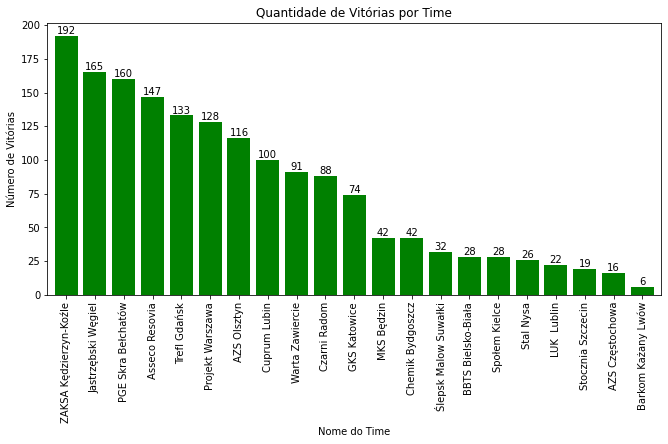

In [560]:
vitorias_por_time = df[df['Vencedor'] == 1].groupby(['Team_1']).size().reset_index(name='Quantidade_de_Vitorias')
vitorias_por_time.sort_values(by='Quantidade_de_Vitorias', ascending=False)

# Criar um gráfico de barras com rótulos de dados e largura ajustada
fig, ax = plt.subplots(figsize=(11, 5))  # Ajustar o tamanho do gráfico
contagem_vitorias_por_time.plot(kind='bar', color='green', ax=ax, width=0.8)  # Ajustar a largura das barras

# Adicionar rótulos de dados acima das barras
for i, v in enumerate(contagem_vitorias_por_time):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# Configurar o título e os rótulos do eixo
plt.title('Quantidade de Vitórias por Time')
plt.xlabel('Time')
plt.ylabel('Número de Vitórias')

plt.show()

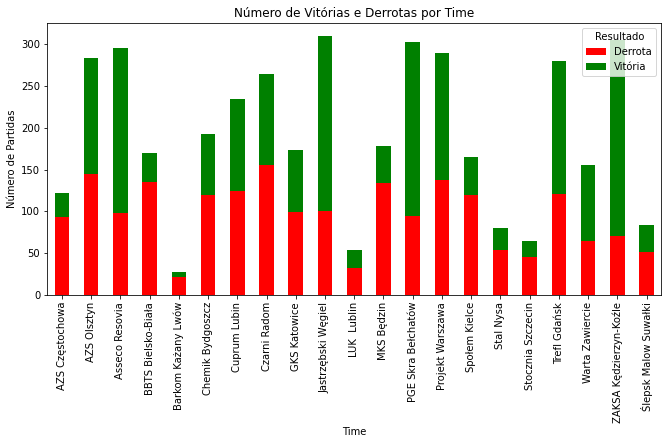

In [562]:
# Criar coluna 'Resultado' com base na coluna 'Vencedor'
df['Resultado'] = np.where(df['Vencedor'] == 1, 'Vitória', 'Derrota')

# Contar o número de vitórias e derrotas por time
contagem_resultados = df.groupby(['Team_1', 'Resultado']).size().unstack(fill_value=0)

cores = {'Vitória': 'green', 'Derrota': 'red'}
# Criar o gráfico de barras empilhadas
contagem_resultados.plot(
    kind='bar', 
    stacked=True, 
    figsize=(11, 5), 
    color=[cores[col] for col in contagem_resultados.columns]
)

# Configurar o título e os rótulos dos eixos
plt.title('Número de Vitórias e Derrotas por Time')
plt.xlabel('Time')
plt.ylabel('Número de Partidas')

# Adicionar legenda
plt.legend(title='Resultado', loc='upper right')

plt.show()

In [2]:
# 1. Definir conceitos:
     # 1.1 Saque: (Total de Ace - Total de Saques errados) / Total de Saques => %
     # 1.2 Bloqueio: Total de Bloqueios / Total de Pontos => % 
     # 1.3 Ataque: Não definido se será utilizado 
# 2. Criar códigos para Estatisticas de bloqueio 
# 3. Criar códigos para Estatisticas de saque 
# 4. Pesquisa: procurar na literatura se bloqueio e saque impactam na quantidade de vitoria de um time 
    # (Matheus, Giovani, André) - ideia/links até dia 07.12.2023 (as 18h). 
    # Aprofundamento da pesquisa até 17.12.2023.
    # Entender se será necessário fazer algo escrito com essas pesquisas.
# 5. Próxima reunião: Quarta-feira (13.12.2023) - 18:30

In [541]:
# mapeamento_colunas = {
#     'Team_1_T1': 'T1',
#     'Score_T1': 'Set_T1',
#     'Score_Partida_T1': 'Set_Score_T1',
#     'Sum_Partida_T1': 'PontuacaoFinal_T1', 
#     'BP_Partida_T1': 'PontosCADoSaque_T1', 
#     'Ratio_Partida_T1': 'Ratio_T1',
#     'Srv_Sum_Partida_T1': 'TotalSaques_T1', 
#     'Srv_Err_Partida_T1': 'TotalSaquesErrados_T1', 
#     'Srv_Eff_Partida_T1': 'PercEficSaque_T1',  
#     'Rec_Sum_Partida_T1': 'TotalSaquesRecebidos_T1', 
#     'Rec_Err_Partida_T1': 'TotalSaquesRecebidosErrados_T1', 
#     'Rec_Pos_Partida_T1': 'PercSaquesRecebidos_T1',
#     'Rec_Perf_Partida_T1': 'PercDeSaquesRecebidosPerfeitos_T1',
#     'Att_Sum_Partida_T1': 'TotalAtaques_T1', 
#     'Att_Err_Partida_T1': 'TotalAtaquesErrados_T1', 
#     'Att_Blk_Partida_T1': 'TotalAtaquesBloqueados_T1', 
#     'Att_Kill_Partida_T1': 'PontosAtaque_T1',   
#     'Att_Kill_Perc_Partida_T1': 'PercPontosAtaque_T1', # (PontosDeAtaque_T1 / TotalAtaques_T1) 
#     'Att_Eff_Partida_T1': 'PercEficAtaque_T1', # (PontosDeAtaque_T1 - TotalAtaquesBloqueados_T1  / T1_TotalAtaques)?
#     'Sum_SAvg_Partida_T1': 'MediaPontuacaoFinal_T1',
#     'BP_SAvg_Partida_T1': 'Media_Pontos_CAProprioSaque_T1',
#     'Srv_Sum_SAvg_Partida_T1': 'MediaSaques_T1',
#     'Srv_Err_SAvg_Partida_T1': 'MediaErros_Saque_T1',
#     'Srv_Ace_SAvg_Partida_T1': 'MediaAces_T1',
#     'Rec_Sum_SAvg_Partida_T1': 'MediaSaquesRecebidos_T1',
#     'Rec_Err_SAvg_Partida_T1': 'MediaSaquesNaoRecebidos_T1',
#     'Att_Sum_SAvg_Partida_T1': 'MediaAtaques_T1',
#     'Att_Err_SAvg_Partida_T1': 'MediaAtaquesErrados_T1',
#     'Att_Blk_SAvg_Partida_T1': 'MediaAtaquesBloqueados_T1',
#     'Att_Kill_SAvg_Partida_T1': 'MediaPontosAtaque_T1',
#     'Blk_Sum_Partida_T1': 'TotalBloqueios_T1', 
#     'Blk_As_Partida_T1': 'TotalBloqueiosGerouCA_T1', 
#     'Blk_Sum_SAvg_Partida_T1': 'MediaPontosBloqueio_T1',
#     'Blk_As_SAvg_Partida_T1': 'MediaBloqueios_T1',
    
#     'Team_1_T2': 'T2',
#     'Score_T2': 'Set_T2',
#     'Score_Partida_T2': 'Set_Score_T2',
#     'Sum_Partida_T2': 'PontuacaoFinal_T2', 
#     'BP_Partida_T2': 'PontosCADoSaque_T2', 
#     'Ratio_Partida_T2': 'RatioT2',
#     'Srv_Sum_Partida_T2': 'TotalSaques_T2',
#     'Srv_Err_Partida_T2': 'TotalSaquesErrados_T2',
#     'Srv_Eff_Partida_T2': 'PercEficSaque_T2',
#     'Rec_Sum_Partida_T2': 'TotalSaquesRecebidos_T2', 
#     'Rec_Err_Partida_T2': 'TotalSaquesRecebidosErrados_T2', 
#     'Rec_Pos_Partida_T2': 'PercSaquesRecebidos_T2',
#     'Rec_Perf_Partida_T2': 'PercDeSaquesRecebidosPerfeitos_T2',
#     'Att_Sum_Partida_T2': 'TotalAtaques_T2', 
#     'Att_Err_Partida_T2': 'TotalAtaquesErrados_T2', 
#     'Att_Blk_Partida_T2': 'TotalAtaquesBloqueados_T2', 
#     'Att_Kill_Partida_T2': 'PontosAtaque_T2', 
#     'Att_Kill_Perc_Partida_T2': 'PercPontosAtaque_T2',  # (PontosDeAtaque_T1 / TotalAtaques_T1) 
#     'Att_Eff_Partida_T2': 'PercEficAtaque_T2', # (PontosDeAtaque_T1 - TotalAtaquesBloqueados_T1  / T1_TotalAtaques)?
#     'Sum_SAvg_Partida_T2': 'MediaPontuacaoFinal_T2',
#     'BP_SAvg_Partida_T2': 'Media_Pontos_CAProprioSaque_T2',
#     'Srv_Sum_SAvg_Partida_T2': 'MediaSaques_T2',
#     'Srv_Err_SAvg_Partida_T2': 'MediaErros_Saque_T2',
#     'Srv_Ace_SAvg_Partida_T2': 'MediaAces_T2',
#     'Rec_Sum_SAvg_Partida_T2': 'MediaSaquesRecebidos_T2',
#     'Rec_Err_SAvg_Partida_T2': 'MediaSaquesNaoRecebidos_T2',
#     'Att_Sum_SAvg_Partida_T2': 'MediaAtaques_T2',
#     'Att_Err_SAvg_Partida_T2': 'MediaAtaquesErrados_T2',
#     'Att_Blk_SAvg_Partida_T2': 'MediaAtaquesBloqueados_T2',
#     'Att_Kill_SAvg_Partida_T2': 'MediaPontosAtaque_T2',
#     'Blk_Sum_Partida_T2': 'TotalBloqueios_T2', #
#     'Blk_As_Partida_T2': 'TotalBloqueiosGerouCA_T2', #
#     'Blk_Sum_SAvg_Partida_T2': 'MediaPontosBloqueio_T2',
#     'Blk_As_SAvg_Partida_T2': 'MediaBloqueios_T2',    
# }
# df.rename(columns=mapeamento_colunas, inplace=True)
# df.head()

In [542]:
# Criar a coluna 'Nome_Time_Vencedor' com base na condição em 'Flag_Vencedor'
# df['Nome_Time_Vencedor'] = np.where(df['Flag_Vencedor'] == 0, df['T1'], df['T2'])

# # Criar a coluna de percentual de pontos de bloqueio em relação ao total de pontos
# df['T1_Perc_Bloqueio'] = (df['T1_PontosDeBloqueio'] / df['T1_PontuacaoFinal']) * 100
# df['T2_Perc_Bloqueio'] = (df['T2_PontosDeBloqueio'] / df['T2_PontuacaoFinal']) * 100

# df['T1_Perc_Bloqueio'] = df['T1_Perc_Bloqueio'].round(1)
# df['T2_Perc_Bloqueio'] = df['T2_Perc_Bloqueio'].round(1)

# df['Ano'] = pd.to_datetime(df['Date']).dt.year

# df.head()

In [544]:
# df = merged_df.drop([
#     'Sum_Partida_T1', 'BP_Partida_T1', 'Srv_Sum_Partida_T1', 'Srv_Err_Partida_T1', 'Srv_Ace_Partida_T1', 
#     'Rec_Sum_Partida_T1', 'Rec_Err_Partida_T1', 'Att_Sum_Partida_T1', 'Att_Err_Partida_T1', 'Att_Blk_Partida_T1', 
#     'Att_Kill_Partida_T1', 'Blk_Sum_Partida_T1', 'Blk_As_Partida_T1','Sum_Partida_T2', 'BP_Partida_T2', 
#     'Srv_Sum_Partida_T2', 'Srv_Err_Partida_T2', 'Srv_Ace_Partida_T2', 'Rec_Sum_Partida_T2', 'Rec_Err_Partida_T2', 
#     'Att_Sum_Partida_T2','Att_Err_Partida_T2', 'Att_Blk_Partida_T2', 'Att_Kill_Partida_T2', 'Blk_Sum_Partida_T2', 
#     'Blk_As_Partida_T2'], axis=1)

In [545]:
# ordenacao_colunas = [
#     'Ano','Date', 'T1', 'T2', 'Flag_Vencedor', 'Nome_Time_Vencedor', 'T1_SetsVencidos', 
#     'T2_SetsVencidos','T1_PontuacaoFinal', 'T1_PontosCAProprioSaque', 'T1_PontosRatio',
#     'T1_TotalSaques', 'T1_TotalSaquesErrados', 'T1_PontosDeAce',
#     'T1_PercEficienciaSaque', 'T1_TotalSaquesRecebidos',
#     'T1_TotalSaquesNaoRecebidos', 'T1_PercSaquesRecebidos',
#     'T1_PercDeSaquesRecebidosPerfeitos', 'T1_TotalAtaques',
#     'T1_TotalAtaquesErrados', 'T1_TotalAtaquesBloqueados',
#     'T1_PontosDeAtaque', 'T1_PercPontosAtaque', 'T1_PercEficienciaAtaque',
#     'T1_PontosDeBloqueio', 'T1_Perc_Bloqueio','T1_TotalDeBloqueiosCA', 'T2_PontuacaoFinal',
#     'T2_PontosCAProprioSaque', 'T2_PontosRatio', 'T2_TotalSaques',
#     'T2_TotalSaquesErrados', 'T2_PontosDeAce', 'T2_PercEficienciaSaque',
#     'T2_TotalSaquesRecebidos', 'T2_TotalSaquesNaoRecebidos',
#     'T2_PercSaquesRecebidos', 'T2_PercDeSaquesRecebidosPerfeitos',
#     'T2_TotalAtaques', 'T2_TotalAtaquesErrados',
#     'T2_TotalAtaquesBloqueados', 'T2_PontosDeAtaque', 'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque', 'T2_PontosDeBloqueio', 'T2_Perc_Bloqueio',
#     'T2_TotalDeBloqueiosCA'
# ]
# df = df[ordenacao_colunas]
# df.head()

### Excluindo algumas colunas da base 

In [546]:
# df = df.drop(columns={
#     'Flag_Vencedor',
    
#     'T1_SetsVencidos',
#     'T1_PontosDeAtaque',
#     'T1_PercPontosAtaque',
#     'T1_PercEficienciaAtaque',    
#     'T1_TotalSaquesRecebidos', 
#     'T1_TotalSaquesNaoRecebidos',
#     'T1_PercSaquesRecebidos',
#     'T1_PercDeSaquesRecebidosPerfeitos',
#     'T1_TotalAtaques',
#     'T1_TotalAtaquesErrados',
#     'T1_TotalAtaquesBloqueados',      
#     'T1_PontosDeAtaque',
#     'T1_PercPontosAtaque',
#     'T1_PercEficienciaAtaque',
    
#     'T2_SetsVencidos',
#     'T2_PontosDeAtaque',
#     'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque',    
#     'T2_TotalSaquesRecebidos', 
#     'T2_TotalSaquesNaoRecebidos',
#     'T2_PercSaquesRecebidos',
#     'T2_PercDeSaquesRecebidosPerfeitos',
#     'T2_TotalAtaques',
#     'T2_TotalAtaquesErrados',
#     'T2_TotalAtaquesBloqueados',      
#     'T2_PontosDeAtaque',
#     'T2_PercPontosAtaque',
#     'T2_PercEficienciaAtaque',
# })

# df.head()

## MÉDIA DE PERCENTUAL DE BLOQUEIO POR TIME

In [ ]:
# # Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
# percentual_bloqueio = pd.concat([df['T1_Perc_Bloqueio'], df['T2_Perc_Bloqueio']])

# # Calcular a média para cada time
# media_bloqueio_por_time = percentual_bloqueio.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# # Criar um gráfico de barras horizontal
# fig, ax = plt.subplots(figsize=(16, 7))
# media_bloqueio_por_time.sort_values().plot(kind='barh', color='skyblue', ax=ax)

# # # Adicionar rótulos de dados acima das barras
# # for i, v in enumerate(media_por_time):
# #     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# # Configurar o título e os rótulos do eixo
# plt.title('Média de Percentual de Bloqueio por Time')
# plt.xlabel('Média de Percentual de Bloqueio')
# plt.ylabel('Nome do Time')

# # Exibir o gráfico
# plt.show()

## MÉDIA DE PERCENTUAL DE EFICIÊNCIA DE SAQUE POR TIME

#### Aqui foi levado em consideração o seguinte cálculo: (Total de Aces - Total de Saques Errados) / Total de Saques + Total de Pontos marcados em um contra ataque do proprio saque

In [ ]:
# # Concatenar as colunas de percentual de bloqueio de TIME1 e TIME2
# percentual_saque = pd.concat([df['T1_PercEficienciaSaque'], df['T2_PercEficienciaSaque']])

# # Calcular a média para cada time
# media_eficiencia_saque_por_time = percentual_saque.groupby(pd.concat([df['T1'], df['T2']])).mean().round(1)

# # Criar um gráfico de barras horizontal
# fig, ax = plt.subplots(figsize=(16, 7))
# media_eficiencia_saque_por_time.sort_values().plot(kind='barh', color='green', ax=ax)

# # # Adicionar rótulos de dados acima das barras
# # for i, v in enumerate(media_por_time):
# #     ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

# # Configurar o título e os rótulos do eixo
# plt.title('Média de Percentual de Eficiência de Saque por Time')
# plt.xlabel('Média de Percentual de Eficiência de Saque')
# plt.ylabel('Nome do Time')

# # Exibir o gráfico
# plt.show()

In [ ]:
# df_relacao = pd.DataFrame({
#     'Contagem_Vitorias': contagem_vitorias_por_time,
#     'Media_Bloqueio': media_bloqueio_por_time, 
#     'Media_Saque': media_eficiencia_saque_por_time
# })

# df_relacao = df_relacao.sort_values(by=[
#     'Contagem_Vitorias', 
#     'Media_Bloqueio',
#     'Media_Saque'
# ], ascending=[False, False, False])

# df_relacao

In [ ]:
# # Agrupando por ano e time, calculando médias e contagem de vitórias
# resultados = df.groupby(['Ano', 'T1']).agg({
#     'T1_PercEficienciaSaque': 'mean',
#     'T1_Perc_Bloqueio': 'mean',
#     'Nome_Time_Vencedor': 'count'
# }).reset_index()

# # Renomeando as colunas
# resultados = resultados.rename(columns={
#     'T1_PercEficienciaSaque': 'media_saques',
#     'T1_Perc_Bloqueio': 'media_bloqueio',
#     'Nome_Time_Vencedor': 'contagem_vitorias'
# })

# # Exibindo os resultados
# resultados


### GRÁFICO DISPERSÃO RELAÇÃO ENTRE MÉDIA DE BLOQUEIO E VITÓRIAS POR TIME

In [ ]:
# # Criar um gráfico de dispersão
# plt.figure(figsize=(16, 7))
# plt.scatter(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'], color='skyblue')

# # Adicionar rótulos aos pontos
# for i, nome_time in enumerate(df_relacao.index):
#     plt.annotate(nome_time, (df_relacao['Media_Bloqueio'][i], df_relacao['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Configurar o título e os rótulos do eixo
# plt.title('Relação entre Média de Bloqueios e Número de Vitórias')
# plt.xlabel('Média de Bloqueios')
# plt.ylabel('Número de Vitórias')

# # Exibir o gráfico
# plt.show()


In [ ]:
# Calcular o coeficiente de correlação
# coeficiente_pearson = scipy.stats.pearsonr(df_relacao['Media_Bloqueio'], df_relacao['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson}')

```Uma correlação de 0.36 indica uma correlação positiva moderada entre as variáveis Media_Bloqueio e Contagem_Vitorias. Isso significa que, em média, à medida que a Media_Bloqueio aumenta, a Contagem_Vitorias também tende a aumentar, mas não de forma perfeita. A magnitude da correlação (0.36) sugere que a relação não é extremamente forte, mas ainda assim existe uma tendência positiva.```

### GRÁFICO DISPERSÃO RELAÇÃO ENTRE EFICIENCIA DO SAQUE E VITÓRIAS POR TIME

In [ ]:
# Criar um gráfico de dispersão
# plt.figure(figsize=(16, 7))
# plt.scatter(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'], color='green')

# # Adicionar rótulos aos pontos
# for i, nome_time in enumerate(df_relacao_saque.index):
#     plt.annotate(nome_time, (df_relacao_saque['Media_Saque'][i], df_relacao_saque['Contagem_Vitorias'][i]), textcoords="offset points", xytext=(0, 5), ha='center')

# # Configurar o título e os rótulos do eixo
# plt.title('Relação entre Média de Eficiência de Saques e Número de Vitórias')
# plt.xlabel('Média de Eficiência de Saques')
# plt.ylabel('Número de Vitórias')

# # Exibir o gráfico
# plt.show()


In [ ]:
# # Calcular o coeficiente de correlação
# coeficiente_pearson_saque = scipy.stats.pearsonr(df_relacao_saque['Media_Saque'], df_relacao_saque['Contagem_Vitorias'])[0]
# print(f'Coeficiente de Pearson = {coeficiente_pearson_saque}')

```Ocoeficiente de correlação de Pearson é 0,8735802344182835. Esse valor é próximo de 1, o que indica uma correlação linear positiva forte entre as duas variáveis. Em outras palavras, as duas variáveis aumentam ou diminuem juntas.```